In [30]:
from IPython.display import Image, display

# Corrected image URLs from Columbia's website
aerodrome_pic        = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Aerodrome.jpg')
air_drop_pic         = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Air_Drop.jpg')
ambush_pic           = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Ambush.jpg')
blockade_pic         = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Blockade.jpg')
containment_pic      = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Containment.jpg')
cover_fire_pic       = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Cover_Fire.jpg')
disrupt_pic          = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Disrupt.jpg')
escalation_pic       = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Escalation.jpg')
heavy_bombers_pic    = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Heavy_Bombers.jpg')
heavy_tanks_pic      = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Heavy_Tanks.jpg')
strategize_pic       = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Strategize.jpg')
maneuver_land_pic    = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Maneuver_Land.jpg')
navigate_pic         = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Navigate.jpg')
redeploy_pic         = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Redeploy.jpg')
reinforce_pic        = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Reinforce.jpg')
super_battleship_pic = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Super_Battleship.jpg')
support_pic          = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Support.jpg')
transport_pic        = Image(url='https://www.columbia.edu/~chw2/Courses/APMA4903/2024/ALS/Air_Land_Sea_Pictures/Transport.jpg')




In [31]:
import random
import itertools

class Card:
  def __init__(self, name, theater_name, theater_pos, value, Ongoing_Instant, pic):
    self.name = name
    self.theater_name = theater_name
    self.theater_pos = theater_pos
    self.value = value
    self.Ongoing_Instant = Ongoing_Instant
    self.pic = pic



def Play_Card(card, played_air_drop, played_aerodrome):
  #Is card playable?
  #if it satisfies proper conditions, it is playable, otherwise it is not
  if played_air_drop == True:
    setattr(card, 'playable', True)
    if card.owner == 1:
      played_air_drop_P1 = False
    elif card.owner == 2:
      played_air_drop_P2 = False
  elif card.face_up == 'D':
    setattr(card, 'playable', True)
  elif card.face_up == 'U':
    if card.theater_pos == card.theater_played_in:
      setattr(card, 'playable', True)
    elif played_aerodrome == True:
      if card.value < 4:
        setattr(card, 'playable', True)
    else:
      setattr(card, 'playable', False)
  else:
    setattr(card, 'playable', False)

  if card.playable == True:
    return card
  else:
    card.face_up == 'D'
    setattr(card, 'playable', True)
    return card



def Adjacent_Theaters(theater_pos):
  right_theater = theater_pos + 1
  left_theater = theater_pos - 1
  adj_theaters = []
  if left_theater != -1:
    adj_theaters.append(left_theater)
  if right_theater != 3:
    adj_theaters.append(right_theater)
  return adj_theaters

def Ambush_Flip(played_card, flipped_card):
  if flipped_card == None:
    pass
  else:
    if flipped_card.face_up == 'U':
      flipped_card.face_up == 'D'
    elif flipped_card.face_up == 'D':
      flipped_card.face_up == 'U'

def Disrupt_Flip(played_card, enemy_flipped_card, flipped_card):
  if flipped_card != None:
    if flipped_card.face_up == 'U':
      flipped_card.face_up == 'D'
    elif flipped_card.face_up == 'D':
      flipped_card.face_up == 'U'
  if enemy_flipped_card != None:
    if enemy_flipped_card.face_up == 'U':
      enemy_flipped_card.face_up == 'D'
    elif enemy_flipped_card.face_up == 'D':
      enemy_flipped_card.face_up == 'U'

def Maneuver_Flip(played_card, flipped_card):
  right_theater = played_card.theater_played_in + 1
  left_theater = played_card.theater_played_in - 1
  if flipped_card == None:
    pass
  elif flipped_card.theater_played_in == right_theater or flipped_card.theater_played_in == left_theater:
    if flipped_card.face_up == 'U':
      flipped_card.face_up == 'D'
    elif flipped_card.face_up == 'D':
      flipped_card.face_up == 'U'


class GameState:

    def __init__(self):
        self.reset()


    def reset(self):
        # init game state
        positions = [0,1,2]
        random.shuffle(positions)
        self.air_pos  = positions[0]
        self.land_pos = positions[1]
        self.sea_pos  = positions[2]

        self.P1_Cards = []
        self.P2_Cards = []
        self.Deck = [Card('Reinforce',     'land', self.land_pos, 1, 'Instant', reinforce_pic    ),
                Card('Ambush',             'land', self.land_pos, 2, 'Instant', ambush_pic       ),
                Card('Maneuver',           'land', self.land_pos, 3, 'Instant', maneuver_land_pic),
                Card('Cover Fire',         'land', self.land_pos, 4, 'Ongoing', cover_fire_pic   ),
                Card('Disrupt',            'land', self.land_pos, 5, 'Instant', disrupt_pic      ),
                Card('Heavy Tanks',        'land', self.land_pos, 6, 'None'   , heavy_tanks_pic  ),

                Card('Support',             'air', self.air_pos,  1, 'Ongoing', support_pic      ),
                Card('Air Drop',            'air', self.air_pos,  2, 'Instant', air_drop_pic     ),
                Card('Strategize',          'air', self.air_pos,  3, 'Instant', strategize_pic   ),
                Card('Aerodrome',           'air', self.air_pos,  4, 'Ongoing', aerodrome_pic    ),
                Card('Containment',         'air', self.air_pos,  5, 'Ongoing', containment_pic  ),
                Card('Heavy Bombers',       'air', self.air_pos,  6, 'None'   , heavy_bombers_pic),

                Card('Transport',           'sea', self.sea_pos,  1, 'Instant', transport_pic    ),
                Card('Escalation',          'sea', self.sea_pos,  2, 'Ongoing', escalation_pic   ),
                Card('Navigate',            'sea', self.sea_pos,  3, 'Instant', navigate_pic     ),
                #Card('Redeploy',            'sea', self.sea_pos,  4, 'Instant', redeploy_pic     ),
                Card('Blockade',            'sea', self.sea_pos,  5, 'Ongoing', blockade_pic     ),
                Card('Super Battleship',    'sea', self.sea_pos,  6, 'Instant', super_battleship_pic)]

        self.cards_played = []
        random.shuffle(self.Deck)
        self.P1_Cards = self.Deck[0:6]
        self.P2_Cards = self.Deck[6:12]
        self.Deck = self.Deck[12:]
        self.aero_drome_P1 = False
        self.aero_drome_P2 = False
        self.containment = False
        self.air_drop_P1 = False
        self.air_drop_P2 = False
        self.theater_0_blockaded = False
        self.theater_1_blockaded = False
        self.theater_2_blockaded = False
        self.actions_P1 = self.action_space()
        self.action_choices = []

    def action_space(self):
#[Card Position in Hand (0), face up (1), theater played in (2), what card do i want to flip (3), Theater to transport to (4)]

        action0 = range(0,5)
        action1 = ['U', 'D']
        action2 = [0,1,2]
        action3 = range(0,5)
        action4 = [0,1,2]

        action_choices = list(itertools.product(action0, action1, action2,  action3, action4))
        return action_choices

    def score(self):
      #Create counters [[P1_air, P1_land, P1_sea], [P2_air, P2_land, P2_Sea]]
      point_totals = [[0,0,0],[0,0,0]]
      escalation_up_P1 = False
      escalation_up_P2 = False

      for card in self.cards_played:
        #Check for Escalation
        if card.name == 'Escalation':
          if card.face_up == 'U':
            #Check if P1 or P2 is owner
            if card.owner == 1:
              escalation_up_P1 = True
            if card.owner == 2:
              escalation_up_P2 = True

      for card in self.cards_played:

        if card.name == 'Cover Fire' and card.face_up == 'U':
          ind = self.cards_played.index(card)
          for c in self.cards_played[0:ind]:
            if c.theater_played_in == card.theater_played_in and c.owner == card.owner:
              added_value = 4 - c.value
              point_totals[card.owner - 1][card.theater_played_in] += added_value

        if card.name == 'Support':
          if card.face_up == 'U':
            right_theater = card.theater_played_in + 1
            left_theater = card.theater_played_in - 1
            if right_theater != 3 :
              point_totals[card.owner - 1][right_theater] += 3
            if left_theater != -1:
              point_totals[card.owner - 1][left_theater] += 3

        #if the card was played face up
        if card.face_up == 'U':
          #add totals based on card's value
          point_totals[card.owner - 1][card.theater_played_in] += card.value

        #if the card if face down, check for escalation, if played, facedowns add 4, else, add 2
        elif card.face_up == 'D':
          if escalation_up_P1 == True:
            if card.owner == 1:
              point_totals[0][card.theater_played_in] += 4
          if escalation_up_P2 == True:
            if card.owner == 2:
              point_totals[1][card.theater_played_in] += 4
          else:
            point_totals[card.owner - 1][card.theater_played_in] += 2

      return point_totals



def Player_Turn(state, Player, action):
        #Player takes a turn
        if Player == 1:
          #this is attempting to account for Redeploy
          if type(action) is list:
            card_pos_in_hand = action[0]
            played_face_up = action[1]
            played_theater = action[2]
            transport_theater = action[4]
          else:
            choice = state.actions_P1[action]
            print(choice)
            if len(state.cards_played)>0:
              if len(state.P1_Cards)<1:
                card_pos_in_hand = 0
              else: card_pos_in_hand = choice[0] % len(state.P1_Cards)
            else: card_pos_in_hand = choice[0]
            played_face_up = choice[1]
            played_theater = choice[2]
            transport_theater = choice[4]
        #choose card based on given action
        if Player == 1:
          played_card = state.P1_Cards[card_pos_in_hand]
          face_up = played_face_up
          theater_position = played_theater
        if Player == 2:
          played_card = state.P2_Cards[0]
          face_up = np.random.choice(['U', 'D'], 1, p=[0.75,0.25])
          if face_up == 'U':
            theater_position = state.P2_Cards[0].theater_pos
          elif face_up == 'D':
            theater_position = random.choice([0,1,2])

       #Give P1's card new attributes
        setattr(played_card, "face_up", face_up)
        setattr(played_card, "theater_played_in", int(theater_position))
        setattr(played_card, "owner", Player)
        setattr(played_card, 'covered', False)
        #print('Player {} is playing {} in theater {} face {}'.format(Player, played_card.name, int(theater_position), face_up))

        #check for blockade
        for card in state.cards_played:
          if card.name == 'Blockade' and face_up == 'U':
            adjacent_theaters = Adjacent_Theaters(card.theater_pos)
            theater_0_card_count = 0
            theater_1_card_count = 0
            theater_2_card_count = 0
            for c in state.cards_played:
              if c.theater_played_in == 0:
                theater_0_card_count += 1
              elif c.theater_played_in == 1:
                theater_1_card_count += 1
              elif c.theater_played_in == 2:
                theater_2_card_count += 1
            if theater_0_card_count >= 3 and 0 in adjacent_theaters:
              state.theater_0_blockaded = True
            if theater_1_card_count >= 3 and 1 in adjacent_theaters:
              state.theater_1_blockaded = True
            if theater_2_card_count >= 3 and 2 in adjacent_theaters:
              state.theater_2_blockaded = True

        #only play cards in non-blockaded theaters
        if played_card.theater_pos == 0 and state.theater_0_blockaded == True:
          print('{} was destroyed'.format(played_card.name))
          if Player == 1:
            state.P1_Cards.remove(played_card)
          if Player == 2:
            state.P2_Cards.remove(played_card)
          game_over = False
          if len(state.P2_Cards) == 0:
            game_over = True
          return game_over, state.score()
        elif played_card.theater_pos == 1 and state.theater_1_blockaded == True:
          print('{} was destroyed'.format(played_card.name))
          if Player == 1:
            state.P1_Cards.remove(played_card)
          if Player == 2:
            state.P2_Cards.remove(played_card)
          game_over = False
          if len(state.P2_Cards) == 0:
            game_over = True
          return game_over, state.score()
        elif played_card.theater_pos == 2 and state.theater_2_blockaded == True:
          print('{} was destroyed'.format(played_card.name))
          if Player == 1:
            state.P1_Cards.remove(played_card)
          if Player == 2:
            state.P2_Cards.remove(played_card)
          game_over = False
          if len(state.P2_Cards) == 0:
            game_over = True
          return game_over, state.score()
        else:
          #No blackade, then continue and play the card
          if Player == 1:
            state.cards_played.append(Play_Card(played_card, state.air_drop_P1, state.aero_drome_P1))
          if Player == 2:
            state.cards_played.append(Play_Card(played_card, state.air_drop_P2, state.aero_drome_P2))

          if None in state.cards_played:
            state.cards_played.remove(None)
            return True,  state.score()


          #Reinforcement Card Ability
          if played_card.name == 'Reinforce' and face_up == 'U':
            print('This is the card from the deck:')
            deck_card = state.Deck[0]
            #display(deck_card.pic)
            setattr(deck_card, "face_up", 'D')
            setattr(deck_card, "owner", Player)
            setattr(deck_card, 'covered', False)
            adjacent_theaters = Adjacent_Theaters(played_card.theater_pos)
            if len(adjacent_theaters) == 1:
              print('Playing {} in theater {} face D'.format(deck_card.name, adjacent_theaters[0]))
              setattr(deck_card, "theater_played_in", adjacent_theaters[0])
            else:
              if Player == 1:
                deck_card_theater = random.choice(adjacent_theaters)
              elif Player == 2:
                deck_card_theater = random.choice(adjacent_theaters)
              setattr(deck_card, "theater_played_in", deck_card_theater)
            state.cards_played.append(deck_card)

          flippable_cards_0 = []
          flippable_cards_1 = []
          flippable_cards_2 = []
          transportable = []
          enemy_flippables = []
          all_flippable = []

          #is the card covered?
          for card in state.cards_played:
            if card.owner == Player:
              if card.theater_pos == theater_position:
                card.covered = True
                state.cards_played[-1].covered = False
              if card.covered == False:
                transportable.append(card)
            elif card.owner != Player:
              if card.covered == False:
                enemy_flippables.append(card)
          if card.covered == False:
            if theater_position == 0:
              flippable_cards_0.append(card)
            elif theater_position == 1:
              flippable_cards_1.append(card)
            elif theater_position == 2:
              flippable_cards_2.append(card)

          if Player ==1:
            all_flippable = flippable_cards_0 + flippable_cards_1 + flippable_cards_2
            if len(all_flippable) > 0:
              if type(action) == list:
                card_to_flip_pos = action[3] % len(all_flippable)
              else: card_to_flip_pos = choice[3] % len(all_flippable)
            else:
              card_to_flip_pos = None

          if len(flippable_cards_0) == 0:
            flippable_cards_0 = [None]
          if len(flippable_cards_1) == 0:
            flippable_cards_1 = [None]
          if len(flippable_cards_2) == 0:
            flippable_cards_2 = [None]
          if len(transportable) == 0:
            transportable = [None]
          if len(enemy_flippables) == 0:
            enemy_flippables = [None]
          if len(all_flippable) == 0:
            all_flippable = [None]


          #Transport Card Ability
          if played_card.name == 'Transport' and face_up == 'U':
            if Player == 1:
              moved_card = random.choice(transportable)
              new_theater = transport_theater
            elif Player == 2:
              moved_card = random.choice(transportable)
              new_theater = random.choice([0,1,2])
            for c in state.cards_played:
              if c == moved_card and c.owner == Player and c.covered == False:
                move = c

            #change which card is covered (important for flipping)
            if moved_card != None:
              covered_cards = []
              for d in state.cards_played:
                if move.theater_pos  == d.theater_pos:
                  covered_cards.append(d)
              covered_cards.remove(move)
              if len(covered_cards) > 0:
                covered_cards[-1].covered = False
              for e in state.cards_played:
                if e.theater_pos  == new_theater:
                  e.covered = True
              move.theater_pos = new_theater


          #Maneuver/Strategize/Navigate Card Ability
          if played_card.value == 3 and face_up == 'U':
            flippable_cards = []
            for c in state.cards_played:
              if c.theater_pos == played_card.theater_pos -1:
                flippable_cards.append(c)
              if c.theater_pos == played_card.theater_pos +1:
                flippable_cards.append(c)
            if len(flippable_cards) > 1:
              if Player == 1:
                flipped_card = flippable_cards[card_to_flip_pos]

              elif Player == 2:
                if flippable_cards == []:
                  print('no card could be flipped')
                  flipped_card = None
                else: flipped_card = random.choice(flippable_cards)

              Maneuver_Flip(played_card, flipped_card)

          #ambush card ability
          if played_card.name == 'Ambush' and face_up == 'U':
            if len(state.cards_played) > 1:
              if Player == 1:
                flipped_card = all_flippable[card_to_flip_pos]
              elif Player == 2:
                flipped_card = random.choice(all_flippable)

              Ambush_Flip(played_card, flipped_card)

          #disrupt card ability
          if played_card.name == 'Disrupt' and face_up == 'U':
            if len(state.cards_played) > 1:
              enemy_flipped_card = random.choice(enemy_flippables)
              if Player == 1:
                flipped_card = all_flippable[card_to_flip_pos]
              elif Player == 2:
                flipped_card = random.choice(all_flippable)
              Disrupt_Flip(played_card, enemy_flipped_card, flipped_card)

          #Air Drop Card Active Check
          if played_card.name == 'Air Drop' and face_up == 'U' and Player == 1:
            state.air_drop_P1 = True
          elif Player == 1:
            state.air_drop_P1 = False

          if played_card.name == 'Air Drop' and face_up == 'U' and Player == 2:
            state.air_drop_P2 = True
          elif Player == 2:
            state.air_drop_P2 = False

          #Aerodrome Card Ability
          if played_card.name == 'Aerodrome' and face_up == 'U':
            if Player == 1:
              state.aero_drome_P1 == True
            elif Player == 2:
              state.aero_drome_P2 == True

          #Check to see if Aerodrome has been flipped
          if state.aero_drome_P1 == True or state.aero_drome_P2 == True:
            for card in state.cards_played:
              if card.name == 'Aerodrome' and card.face_up == 'D':
                state.aero_drome_P1 == False
                state.aero_drome_P2 == False

        #Containment Card Active?
          for card in state.cards_played:
            if card.name == 'Containment' and card.face_up == 'U':
              state.containment = True

          #Check to see if Containment has been flipped
          if state.containment == True:
            for card in state.cards_played:
              if card.name == 'Containment' and card.face_up == 'D':
                state.containment == False

          #Containment Card Ability
          if state.containment == True:
            if state.cards_played[-1].face_up == 'D':
              print('Containment destroyed ' + str(state.cards_played[-1].name))
              state.cards_played.remove(state.cards_played[-1])

          #Redeploy Card Ability - Temporarily removed
          if played_card.name == 'Redeploy' and face_up == 'U':
            returned_card = 'Redeploy'
            if Player == 1:
              while returned_card == 'Redeploy':
                returned_card = random.choice(transportable)
            elif Player ==2:
              while returned_card == 'Redeploy':
                returned_card = random.choice(transportable)
            if Player == 1:
              returned_card_attributeless = Card(returned_card.name, returned_card.theater_name, returned_card.theater_pos,
                                                 returned_card.value, returned_card.Ongoing_Instant, returned_card.pic)
              state.P1_Cards.append(returned_card_attributeless)
              state.P1_Cards.remove(played_card)
              for c in state.P1_Cards:
                print(c.name)
            elif Player == 2:
              returned_card_attributeless = Card(returned_card.name, returned_card.theater_name, returned_card.theater_pos,
                                                 returned_card.value, returned_card.Ongoing_Instant, returned_card.pic)
              state.P2_Cards.append(returned_card_attributeless)
              state.P2_Cards.remove(played_card)
              for c in state.P2_Cards:
                print(c.name)
            state.cards_played.remove(returned_card)
            print("Returned {} to hand".format(returned_card.name))


            next = random.choice(range(0,len(state.P1_Cards)))
            next_face_up = np.random.choice(['U', 'D'], 1, p=[0.75,0.25])
            if next_face_up == 'D':
              next_theater = random.choice([0,1,2])
            elif next_face_up == 'U':
              next_theater = state.P1_Cards[next].theater_pos
            print("Player {} takes another turn".format(Player))
            if Player == 1:
              Player_Turn(state, 1, action = [next, next_face_up, next_theater, card_to_flip_pos, transport_theater])
            elif Player == 2:
              Player_Turn(state, 2, action = None)


        #Remove cards from Hand
        if Player == 1:
          state.P1_Cards.remove(played_card)
        elif Player == 2:
          state.P2_Cards.remove(played_card)

        game_over = False
        if len(state.P2_Cards) == 0:
          game_over = True

        return game_over, state.score()

In [37]:
def calculate_reward(Player, scores, game_over):
    P1_reward = 0
    theaters_won_P1 = 0

    # Check theater wins
    if scores[0][0] > scores[1][0]:
        theaters_won_P1 += 1
    if scores[0][1] > scores[1][1]:
        theaters_won_P1 += 1
    if scores[0][2] > scores[1][2]:
        theaters_won_P1 += 1

    # Assign rewards
    if Player == 1:
        if game_over:
            # Assign a large reward for winning the game
            if theaters_won_P1 == 3:
                return 100  # Win with all theaters
            elif theaters_won_P1 == 2:
                return 75  # Win with two theaters
            elif theaters_won_P1 == 1:
                return 25  # Win with one theater
            else:
                return -100  # Loss

        # Intermediate rewards
        else:
          if theaters_won_P1 == 1:
            P1_reward += 0
          elif theaters_won_P1 == 2:
            P1_reward += 25
          elif theaters_won_P1 == 3:
            P1_reward += 30
          else:
            P1_reward -= 10  # Consider negative reward for losing theaters

    # Add similar logic for Player 2 if needed
    return P1_reward

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import gym
from gym import spaces
import numpy as np


class AirLandSeaEnv(gym.Env):
    def __init__(self):
        super(AirLandSeaEnv, self).__init__()
        self.state = GameState()
        self.action_space = spaces.Discrete(len(self.state.actions_P1))
        self.observation_space = spaces.Box(low=0, high=1, shape=(113,), dtype=np.float32)
        self.games_played = []

    def reset(self):
        self.state.reset()

        return self._get_obs()

    def step(self, action):
        # Call the Player_Turn method with action
        Player = 1
        game_over, score = Player_Turn(self.state, Player, action)
        if game_over == False:
          game_over, score = Player_Turn(self.state, 2, False)
        else:
          print('game ended')
        reward = calculate_reward(Player, score, game_over)
        if game_over == True:
          if reward > 70:
            self.games_played.append(1)
          else:
            self.games_played.append(0)
          if len(self.games_played)>100:
            win_percentage = sum(self.games_played[-100:])/len(self.games_played[-100:])
          else:
            win_percentage = sum(self.games_played)/len(self.games_played)
          print("win percentage is: {}".format(win_percentage))
        obs = self._get_obs()

        # Calculate the reward
        # Return new state, reward, done, info
        return obs, reward, game_over

    def _get_obs(self):
      theater_order = [self.state.land_pos/3, self.state.sea_pos/3, self.state.air_pos/3]

      p1_hand = []
      for card in self.state.P1_Cards:
          p1_hand.extend([card.value / 6, card.theater_pos / 3])
      while len(p1_hand) < 12:  # 6 cards * 2 attributes
          p1_hand.extend([0, 0])

      p2_hand = []
      for card in self.state.P2_Cards:
          p2_hand.extend([card.value / 6, card.theater_pos / 3])
      while len(p2_hand) < 12:
          p2_hand.extend([0, 0])

      if self.state.Deck:
          deck_card = [self.state.Deck[0].value / 6, self.state.Deck[0].theater_pos / 3]

      cards_played = []
      for card in self.state.cards_played:
          face = 1 if card.face_up == 'U' else 0.5
          cover = 1 if card.covered else 0.5
          cards_played.extend([card.value / 6, card.theater_pos / 3, face, cover, card.theater_played_in / 3, card.owner / 2])
      while len(cards_played) < 78:  # 13 cards * 6 attributes
          cards_played.extend([0] * 6)

      scores = self.state.score()
      norm_score = []
      for x in scores:
          norm_score.extend([x[0] / 30, x[1] / 30, x[2] / 30])

      # Concatenate all parts
      current_state = theater_order + p1_hand + p2_hand + deck_card + cards_played + norm_score
      return np.array(current_state, dtype=np.float32)

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.fc3(x), dim=-1)  # Output probabilities

In [40]:
from os import stat_result
import matplotlib.pyplot as plt
def compute_returns(rewards, gamma=0.99):
    returns = []
    R = 0
    for r in reversed(rewards):
        R = r + gamma * R  # Update return
        returns.insert(0, R)

    return torch.FloatTensor(returns)

def train(env, policy_net, num_episodes=1000):
    optimizer = optim.Adam(policy_net.parameters(), lr=0.001)  # Adjusted learning rate
    all_rewards = []

    for episode in range(num_episodes):
        sstate = env.reset()
        rewards = []
        log_probs = []

        done = False
        epsilon = 0.1

        while not done:
            state_tensor = torch.FloatTensor(sstate)
            action_probs = policy_net(state_tensor)
            if np.random.rand() < epsilon:
              action = np.random.choice(env.action_space.n)  # Explore
            else:
              action = np.random.choice(env.action_space.n, p=action_probs.detach().numpy())  # Exploit
            next_state, reward, done = env.step(action)
            rewards.append(reward)
            log_probs.append(torch.log(action_probs[action]))
            sstate = next_state
            #print(f'Episode {episode}, Action Probabilities: {action_probs.detach().numpy()}')

        returns = compute_returns(rewards)
        loss = -torch.sum(torch.stack(log_probs) * returns)

        optimizer.zero_grad()
        loss.backward()
        for name, param in policy_net.named_parameters():
          if param.grad is not None:
            print(f'{name} gradient: {param.grad.norm()}')
        torch.nn.utils.clip_grad_norm_(policy_net.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()

        rewards_sum = sum(rewards)
        all_rewards.append(rewards_sum)
        print(f'Episode {episode}, Loss: {loss.item()}, Total Reward: {rewards_sum}')

    # Plotting rewards
    plt.plot(all_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()


Streaming output truncated to the last 5000 lines.
win percentage is: 0.39
fc1.weight gradient: 131.02853393554688
fc1.bias gradient: 43.476375579833984
fc2.weight gradient: 129.9143524169922
fc2.bias gradient: 155.81272888183594
fc3.weight gradient: 105.6840591430664
fc3.bias gradient: 101.44813537597656
Episode 29696, Loss: 1281.704345703125, Total Reward: 50
(3, 'U', 0, 1, 0)
(1, 'U', 2, 2, 1)
(2, 'D', 0, 2, 2)
This is the card from the deck:
Playing Maneuver in theater 1 face D
(0, 'U', 2, 0, 1)
(4, 'U', 2, 3, 2)
(1, 'U', 1, 0, 0)
win percentage is: 0.39
fc1.weight gradient: 99.39035034179688
fc1.bias gradient: 8.35368824005127
fc2.weight gradient: 291.5851745605469
fc2.bias gradient: 199.76719665527344
fc3.weight gradient: 383.0130920410156
fc3.bias gradient: 328.9656982421875
Episode 29697, Loss: 4526.08203125, Total Reward: 175
(3, 'D', 2, 4, 0)
(2, 'U', 1, 1, 1)
(1, 'U', 0, 3, 0)
(0, 'U', 2, 3, 0)
(4, 'D', 2, 3, 0)
(2, 'U', 2, 4, 0)
win percentage is: 0.38
fc1.weight gradient: 

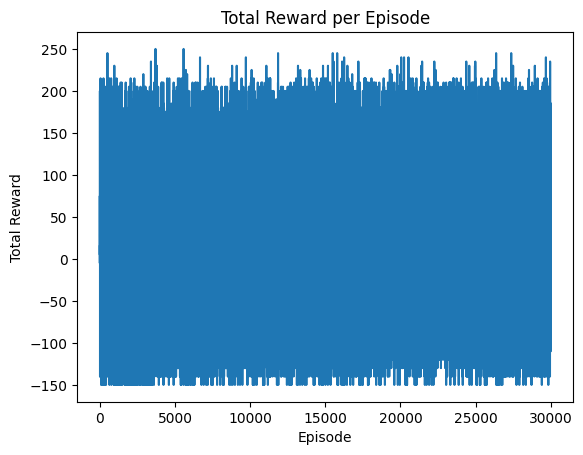

In [41]:
env = AirLandSeaEnv()
input_size = env.observation_space.shape[0]
output_size = env.action_space.n
train(env, PolicyNetwork(input_size, output_size), num_episodes=30000)